# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Restart kernel after this
#!pip310 install .

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

Everything that follows assumes we are using the multi-agent version of the Reacher environment ([download the Windows environment here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86_64.zip)).

In [3]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe', no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
SKIP_RANDOM = True

if not SKIP_RANDOM:

    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. Train with Deep Deterministic Policy Gradient (DDPG)

DDPG is an extension of the Deep Q-Network (DQN) to continuous-action spaces. Q-Learning, including DQN, is restricted by the evaluation of the argmax of the action-value function to discrete action spaces. DDPG circumvents this by using a separate network to find the action corresponding to the action-value maximum. As implemented it has two components:

1. An Actor that outputs a vector of continuous actions using the action-value estimated by the Critic
2. A Critic that estimates the action-value (Q-value) from the measured state and applied action

Each Actor and Critic has a local and target flavour to stabilize the learning.

In [7]:
from collections import deque
import torch
from learner.ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Hyperparameters

REPLAY_BUFFER_SIZE = int(1e6)   # replay buffer size
REPLAY_BATCH_SIZE = 120         # minibatch size
FUTURE_DISCOUNT = 0.99          # discount factor
SOFT_UPDATE_RATE = 1e-3         # soft update rate
LR_ACTOR = 1e-4                 # learning rate of the actor 
LR_CRITIC = 2e-4                # learning rate of the critic
WEIGHT_DECAY = 0.0001           # L2 weight decay

USE_TWO_MEMS = True             # Whether to separately sample good vs bad experiences
GOOD_MEM_RATIO = 0.25           # Good vs bad experience ratio in sampling
UNIFORM_SAMPLE_MIN_SCORE = 50   # Minimum score above which we revert to sampling good and bad experiences uniformly

ADD_NOISE = True                # Whether to add OU noise
NOISE_SIGMA_START = 0.15        # Start of the OU noise standard deviation
NOISE_SIGMA_DECAY = 0.98        # Decay rate of the OU standard deviation
NOISE_SIGMA_MIN = 0.001         # Minimum of the OU noise standard deviation

N_EPISODES = 600
MAX_T = 1000
VICTORY_SCORE = 30

In [9]:
agent = Agent(state_size, action_size, random_seed=5, 
              replay_buffer_size=REPLAY_BUFFER_SIZE, replay_batch_size=REPLAY_BATCH_SIZE, future_discount=FUTURE_DISCOUNT, soft_update_rate=SOFT_UPDATE_RATE, 
              lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, add_noise=ADD_NOISE, use_two_mems=USE_TWO_MEMS, good_mem_ratio=GOOD_MEM_RATIO)

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
uniform_sampling = False
noise_sigma = NOISE_SIGMA_START
solved = False

for i_episode in range(N_EPISODES):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    total_rewards = np.zeros(num_agents)

    for t in range(MAX_T):
        # Get agent's action per policy
        actions = agent.act(states, noise_sigma)

        # Apply agent's action to env
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations     # get the next state
        rewards = env_info.rewards                     # get the reward
        dones = env_info.local_done                    # see if episode has finished

        # Agent remembers and learns
        for n in range(num_agents):
            # Only learn once per 2 time steps
            perform_learn = (n >= num_agents-1) and (t % 2 == 0)
            agent.step(states[n], actions[n], rewards[n], next_states[n], dones[n], perform_learn, uniform_sampling)

        states = next_states
        total_rewards += rewards
        if np.any(dones):
            break    

    mean_total_reward = np.mean(total_rewards)
    scores_window.append(mean_total_reward)       # save most recent score
    scores.append(mean_total_reward)              # save most recent score

    if i_episode % 10 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

    if np.mean(scores_window) >= VICTORY_SCORE and not solved:
        solved = True
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.actor_local.state_dict(), 'trained_weights/solved_actor.pt')
        torch.save(agent.critic_local.state_dict(), 'trained_weights/solved_critic.pt')

    # Latch uniform sampling once score has reached certain threshold
    uniform_sampling = np.mean(scores_window) >= UNIFORM_SAMPLE_MIN_SCORE or uniform_sampling

    # Noise helps with exploration, but needs to decay
    noise_sigma = max(NOISE_SIGMA_MIN, noise_sigma*NOISE_SIGMA_DECAY)


torch.save(agent.actor_local.state_dict(), 'trained_weights/termination_actor.pt')
torch.save(agent.critic_local.state_dict(), 'trained_weights/termination_critic.pt')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Mean Score')
plt.xlabel('Episode #')
plt.savefig('plots/Scores.png')

env.close()

Episode 0	Average Score: 0.15
Episode 10	Average Score: 0.11
Episode 20	Average Score: 0.55
Episode 30	Average Score: 0.82
Episode 40	Average Score: 1.08
Episode 50	Average Score: 1.57
Episode 60	Average Score: 2.07
Episode 70	Average Score: 2.61
Episode 80	Average Score: 3.17
Episode 90	Average Score: 3.66
Episode 100	Average Score: 4.33
Episode 110	Average Score: 5.42
Episode 120	Average Score: 6.42
Episode 130	Average Score: 7.38
Episode 140	Average Score: 8.44
Episode 150	Average Score: 9.33
Episode 160	Average Score: 10.20
Episode 170	Average Score: 11.04
Episode 180	Average Score: 11.84
Episode 190	Average Score: 12.59
Episode 200	Average Score: 13.17
Episode 210	Average Score: 13.69
Episode 220	Average Score: 14.25
Episode 230	Average Score: 14.78
Episode 240	Average Score: 15.18
Episode 250	Average Score: 15.65
Episode 260	Average Score: 15.99
Episode 270	Average Score: 16.35
Episode 280	Average Score: 16.98
Episode 290	Average Score: 17.94
Episode 300	Average Score: 18.94
Epis

KeyboardInterrupt: 

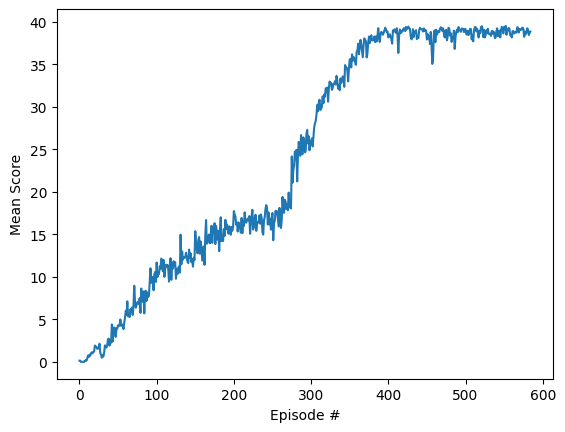

In [10]:
torch.save(agent.actor_local.state_dict(), 'trained_weights/termination_actor.pt')
torch.save(agent.critic_local.state_dict(), 'trained_weights/termination_critic.pt')

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Mean Score')
plt.xlabel('Episode #')
plt.savefig('plots/Scores.png')

env.close()

### 4. Watch the Smart Agent

Restart kernel if running this right after training to reload Unity.

In [1]:
from unityagents import UnityEnvironment
from learner.ddpg_agent import Agent
import numpy as np
import torch

env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe', no_graphics=False, worker_id = 100)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations

num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
state_size = states.shape[1]
agent = Agent(state_size, action_size, add_noise=False)
agent.actor_local.load_state_dict(torch.load('trained_weights/solved_actor.pt'))
agent.critic_local.load_state_dict(torch.load('trained_weights/solved_critic.pt'))

total_rewards = np.zeros(num_agents)
for t in range(1000):
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]
    states = env_info.vector_observations
    dones = env_info.local_done
    total_rewards += env_info.rewards
    if np.any(dones):
        break 
            
print('\rMean Total Score: {:.2f}'.format(np.mean(total_rewards)))
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
W:\Temp\ipykernel_25728\1499157691.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a

Mean Total Score: 39.04
